In [1]:
text = """
# Meeting 6

## 대시보드 논의

- ~~1안: 61개의 대시보드 생성~~
    - ~~그런데, 특수 기계의 경우에는 어떤 데이터를 수집해서 보여주는 것이 무리~~
- 2안: 인자를 받아서 네이버 기사나 논문을 보여주기
    - 실시간 크롤링의 문제

### 클라우드

- 출원서 제목으로 키워드 추출 → 워드 클라우드 생성
        
- 특허 출원 그래프 → 연도별 특허 동향 엑셀 파일 받아놓음. 시각화 그래프 한두개 넣으면 될듯
    
    [국제특허분류(IPC)별 등록(특허ㆍ실용신안).xls]
### 동향 대시보드

- **네이버 뉴스 : 실시간 크롤링**
    - input text를 LLM으로 한단어 요약 (발명품) → ‘요약단어 + 특허’로 검색
    - 발명품과 관련한 특허 및 기술 뉴스들을 제시함
        - 기사 제목과 원문 URL 볼 수 있게
        - 관련 적은 기사를 거를 수 있는
- **논문**
    - API 사용 → 입력한 키워드로 검색해서 관련 논문 제목 쭉 뽑아주기
- 문자를 입력 받고 → LLM으로 요약해서 발명품 키워드 정리 → API 통해 검색
- 워드 클라우드는 ‘기술’ ‘발명’ ‘특허’
- [ ]  논문 크롤링…….

---

## 진짜 정말 오늘은 해야한다 역할분담

1. 프론트엔드
2. 백엔드??
3. DB 구축??
4. 명세서 보조
    1. GPT-4-vision 요청, 파인튜닝 여부 질문
    2. 퐈인튜닝을 위한 데이터 수집
    3. 프롬프트 엔지니어링 
5. 유사도 판별]
    1. huggingface patent 모델 어디까지 사용할 수 있는지부터 확인 
    2. 데이터 수집
    3. 유사도 분석 
6. 연구 동향 대시보드
    1. 워드 클라우드
        1. 출원 특허 키워드 추출
        2. 워드 클라우드 생성
    2. GPT를 통해 유저한 입력한 검색어 요약 
    3. 뉴스 기사, 논문 기사 제목, 링크 크롤링
    ### 세부 역할 분담

- 데이터 수집 & 기본적인 EDA
    - 명세서 작성 보조
        - 도안 예시, 명세서 예시
    - 국내/해외 유사도 판별
        - 특허 DB 구축
            - [AIHub 논문 자료 요약 데이터 중 특허 명세서 데이터 17만개
                - 국가 / 특허 코드 (특허ID) / 산업분류 (ipc 분류코드) / 요약 내용 / 연도 / 원문링크(pdf url) / 특허분류(IPC) → 산업명 /
            - 특허 데이터 수집 → 키프리스 내 엑셀 다운로드
                - IPC 번호별 1차 필터링 → 국가별 2차 필터링 (유럽, 중국, 미국, 일본, PCT) → 3페이지씩
        - 국내
            - 특허 데이터베이스 구축
            - 특허 데이터 수집
        - 해외
            - 키프리스 다운로드 후 요약 내역 번역
            - 다국어 데이터 처리
        - 유사도 측정
    - R&D 연구 동향 대시보드
        - 하루에 한 번 갱신
        - 논문(논문 제목? 태그?)
        - 네이버 뉴스
        - 워드 클라우드
- 명세서 작성 보조
- 국내/해외 유사도 판별
- R&D 연구 동향 대시보드
- 프론트엔드
- 백엔드

- 발표준비 / 시나리오 작성 (필요성/유저스토리) @지수
    - BM에 대한 설명까지
    - 어떠한 과정에서 이 서비스를 필요로 하고 어떻게 사용하는지에 대한 설명이 필요
- 기술력과 사업성의 비중이 5:5

### 플래닝

- 각 팀별 페이지에 세부 Task 정리 및 기한 정리
    - 개인적으로는 2/11~13일 안에 위에 기능 마무리
    - 추가 기능 논의해서 구현했으면 좋겠음
- 기본적으로 다른 팀은 서비스 기획을 1개만 함. 우리는 3개 기획했기 때문에 추가적으로 더 구현하는거에 집착 안해도 될 것 같음
"""

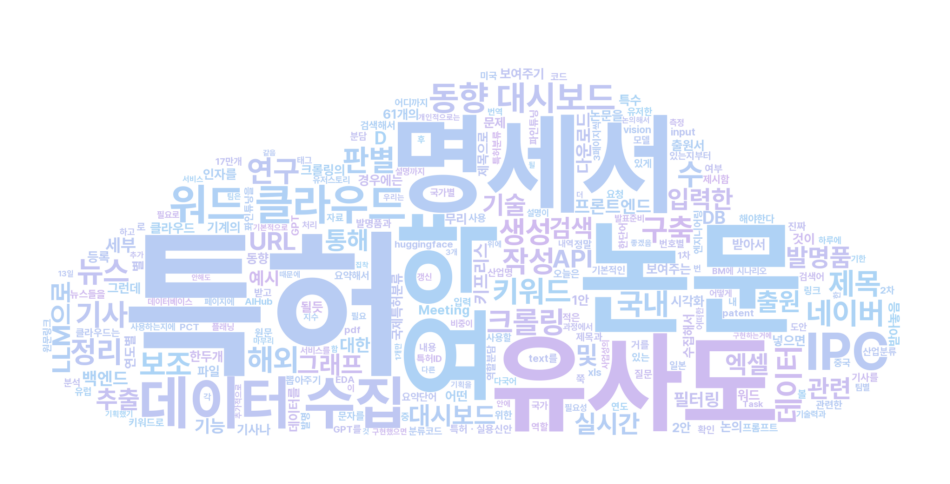

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from PIL import Image

colors = ["#a9d6f6", "#d2baef"]


cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

mask = np.array(Image.open("/Users/kimjisu/Desktop/papa/public/cloud.png"))

stopwords = set(STOPWORDS)
stopwords.add("*")
stopwords.add("-")
stopwords.add("#")

font_path = '/Users/kimjisu/Desktop/papa/public/font/Pretendard-Bold.ttf'

wordcloud = WordCloud(background_color="white",
                      max_words=3000,
                      mask=mask,
                      colormap=cmap,
                      stopwords=stopwords,
                      font_path=font_path).generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("/Users/kimjisu/Desktop/papa/public/output.png")
